<a href="https://colab.research.google.com/github/nikhilkoditala/CSC-8980-NLP/blob/main/NLP_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Nikhil Koditala

# Panther ID: 002571023

In [3]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sb
import spacy

from collections import Counter, defaultdict
from itertools import tee

In [4]:
# vectorization methods
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

**Question 1) (20 points) Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’, ‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five most similar words. For this task you have to use the most suitable method of the ones we have seen in class to determine the most similar words to the original input list. You can use a pre-trained resource if you think is appropriate. After calling your function, print the most similar words to the screen.**

In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
1.65GB [00:10, 153MB/s]


In [ ]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

gzip: /content/GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
def most_similar(input_list):
  res_list = []
  for word in input_list:
    temp = []
    sim_words = model.most_similar(word)[:5]
    for d in sim_words:
      temp.append(d[0])
    res = [word]
    res.append(temp)
    res_list.append(res)
  return res_list

In [ ]:
input_list = ['apple', 'house', 'pear', 'dog', 'doctor']

In [ ]:
res_list = most_similar(input_list)

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
res_list

[['apple', ['apples', 'pear', 'fruit', 'berry', 'pears']],
 ['house', ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse']],
 ['pear', ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple']],
 ['dog', ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat']],
 ['doctor', ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]]

**Are these ‘similar’ words actually similar? If not, why not? What do you think can be improved and how - talk about it, do not necessarily implement it?**

The above approach of using word2vec and finding similar words was giving good results. For each of the input word, it is able to find a related word. For example, given doctors the model returned different types of doctors.

Despite the advantages, word2vec doesn't provide context sensitive embeddings which is one disadvantage. Modesl such as ELMO and BERT were able to handle context sensitivity better.


**Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files, shakespeares-works_TXT_FolgerShakespeare.zip.**


In [ ]:
!unzip '/content/shakespeares-works_TXT_FolgerShakespeare.zip' -d 'shakespeares-works_TXT_FolgerShakespeare'

In [ ]:
file_paths = os.listdir('/content/shakespeares-works_TXT_FolgerShakespeare') 

In [ ]:
file_paths

a) Cosine similarity. And create a 42 x 42 heatmap of these similarities.


In [ ]:
text = []
for path in file_paths:
  if(path.split('.')[-1] == 'txt'):
    f = open(os.path.join('/content/shakespeares-works_TXT_FolgerShakespeare',path),'r') 
    text.append(f.read())

In [ ]:
def build_cosine(documents):
  tfidf = TfidfVectorizer()
  matrix = tfidf.fit_transform(documents) 
  matrix = matrix.astype(np.float32) # converting matrix to float32 to use Google Colab RAM efficiently
  return cosine_similarity(matrix,matrix)

In [ ]:
cosine_matrix = build_cosine(text)

In [ ]:
cosine_matrix

array([[0.99999666, 0.4866196 , 0.49917883, ..., 0.6020113 , 0.587446  ,
        0.4946799 ],
       [0.4866196 , 0.9999977 , 0.47067878, ..., 0.59251404, 0.57559925,
        0.46439424],
       [0.49917883, 0.47067878, 0.99999815, ..., 0.58301455, 0.5659723 ,
        0.481636  ],
       ...,
       [0.6020113 , 0.59251404, 0.58301455, ..., 1.0000024 , 0.843792  ,
        0.57159185],
       [0.587446  , 0.57559925, 0.5659723 , ..., 0.843792  , 0.99999976,
        0.5546956 ],
       [0.4946799 , 0.46439424, 0.481636  , ..., 0.57159185, 0.5546956 ,
        0.99999964]], dtype=float32)

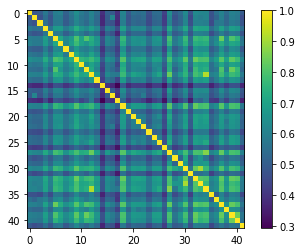

In [ ]:
# Plotting a continuous heatmap
plt.imshow(cosine_matrix, cmap='viridis')
plt.colorbar()

b) Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this.


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(text)]

In [ ]:
max_epochs = 50
vec_size = 50
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [ ]:
similar_doc = model.docvecs.most_similar('1',topn=42)
print(similar_doc)

[('16', 0.5943615436553955), ('22', 0.5071779489517212), ('8', 0.44327008724212646), ('35', 0.4279804527759552), ('24', 0.41615694761276245), ('6', 0.3888361155986786), ('41', 0.3839137554168701), ('10', 0.36380112171173096), ('23', 0.3516691327095032), ('36', 0.3426838517189026), ('4', 0.33621886372566223), ('27', 0.3330827057361603), ('29', 0.31400981545448303), ('38', 0.3123456537723541), ('13', 0.3041009306907654), ('15', 0.29997700452804565), ('7', 0.2931181788444519), ('26', 0.28913718461990356), ('17', 0.28217384219169617), ('18', 0.25904858112335205), ('14', 0.2579059600830078), ('28', 0.2569320797920227), ('34', 0.2515232563018799), ('25', 0.24071824550628662), ('40', 0.22631502151489258), ('32', 0.22534795105457306), ('11', 0.20163612067699432), ('9', 0.20004338026046753), ('12', 0.1932675987482071), ('19', 0.1811007261276245), ('39', 0.1675184667110443), ('30', 0.15248458087444305), ('20', 0.1394958794116974), ('31', 0.1368507295846939), ('2', 0.11948559433221817), ('3', 0.1

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
cosine_matrix_d2v = [[1 for i in range(42)] for j in range(42)]

In [ ]:
for i in range(42):
  similar_doc = model.docvecs.most_similar(i,topn=42)
  for sim in similar_doc:
    cosine_matrix_d2v[i][int(sim[0])] = sim[1]

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


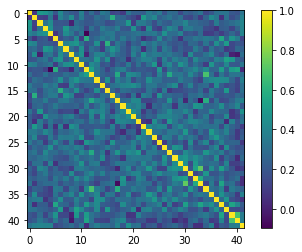

In [ ]:
# Plotting a continuous heatmap
plt.imshow(cosine_matrix_d2v, cmap='viridis')
plt.colorbar()

c) What are the differences you find between the two methods? Is there anything radically different? Please describe your answer in terms of the heatmap of part a and part b.

The cosine similarity matrix looks more smoother, where as the matrix built from doc2vec has a lot of discontinuity in it. The similarity of doc2vec were better than that of the ones with cosine, as there are no common patterns there.

Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following: 

a) Write a function to generate all unique bigrams from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the list of bigrams and their frequency. Display the top 10 most common bigrams and their frequency.



In [14]:
import spacy
import os
from collections import Counter, defaultdict
from itertools import tee

nlp = spacy.load('en_core_web_sm')

In [ ]:
!unzip '/content/shakespeares-works_TXT_FolgerShakespeare.zip' -d 'shakespeares-works_TXT_FolgerShakespeare'

In [16]:
file_paths = os.listdir('/content/shakespeares-works_TXT_FolgerShakespeare') 

In [17]:
text_q3 = ''
for path in file_paths:
  if(path.split('.')[-1] == 'txt'):
    f = open(os.path.join('/content/shakespeares-works_TXT_FolgerShakespeare',path),'r') 
    text_q3 += f.read()

In [18]:
# helper functions
def make_trigrams(iterator):
    a, b, c = tee(iterator, 3)
    next(b)
    next(c)
    next(c)
    return zip(a, b, c)

def make_bigrams(iterator):
    a, b = tee(iterator, 2)
    next(b)
    return zip(a, b)

def make_unigrams(iterator):
    return iterator

In [19]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

def uni_bi_tri_counter(doc):
    # print(doc)
    tokenized = nlp.tokenizer.pipe([doc])
    tokenized = [t.text for d in tokenized for t in d]
    return Counter(make_unigrams(tokenized)), Counter(make_bigrams(tokenized)), Counter(make_trigrams(tokenized))

In [22]:
def bigram_gen(data):
  data_list = data.split('.')
  data_list = split(data_list,10)
  bigram_counter = Counter()

  for cur_data in data_list:
    cur_data += ' .'
    cur_data = ' . '.join(cur_data)
    cur_unigram_counter, cur_bigram_counter, cur_trigram_counter = uni_bi_tri_counter(cur_data)
    bigram_counter += cur_bigram_counter
  return bigram_counter

In [23]:
bigram_counter = bigram_gen(text_q3)

In [24]:
print(bigram_counter.most_common(10))

[((',', '\n'), 23309), (('.', '\n\n'), 21552), (('.', ' '), 16138), (('.', '\n'), 14622), ((',', 'and'), 7240), (('\n', 'And'), 7145), (('.', ']'), 6767), (('=', '='), 6322), (('?', '\n\n'), 6044), (('\n', 'I'), 4330)]


b) Write a function to generate all unique trigrams from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the list of trigrams and their frequency. Display the top 10 most common trigrams and their frequency.



In [25]:
def trigram_gen(data):
  data_list = data.split('.')
  data_list = split(data_list,10)
  trigram_counter = Counter()
  for cur_data in data_list:
    cur_data += ' .'
    cur_data = ' . '.join(cur_data)
    cur_unigram_counter, cur_bigram_counter, cur_trigram_counter = uni_bi_tri_counter(cur_data)
    trigram_counter += cur_trigram_counter

  return trigram_counter

In [26]:
trigram_counter = trigram_gen(text_q3)

In [27]:
print(trigram_counter.most_common(10))

[(('=', '=', '='), 5309), ((',', '\n', 'And'), 3568), (('.', ']', '\n\n'), 2965), (('.', '\n', '['), 2556), (('.', ']', '\n\n\n'), 2189), (('.', ' ', 'I'), 2006), (('\n\n', '[', 'Enter'), 1515), (('.', '\n', 'I'), 1133), (('.', '\n\n', '['), 1092), (('.', ']', '\n'), 1016)]


c) Write a function to extract all unique NOUN and VERB tokens. The input of this function should be the concatenated dataset and the output should be two lists: one of the NOUN tokens and their frequency, the other list should be the VERB tokens and their counts. Display the top 10 most common NOUN and VERB tokens.


In [28]:
def noun_verb_counter(doc):
  tokenized = nlp(doc)
  verb_tokens = [token.text for token in tokenized if token.pos_ == "VERB"]
  noun_tokens = [token.text for token in tokenized if token.pos_ == "NOUN"]
  return Counter(noun_tokens), Counter(verb_tokens)

In [30]:
def count_noun_verb(data):
  data_list = data.split('.')
  data_list = split(data_list,10)
  noun_counter = Counter()
  verb_counter = Counter()
  for cur_data in data_list:
    cur_data += ' .'
    cur_data = ' . '.join(cur_data)
    cur_noun_counter, cur_verb_counter = noun_verb_counter(cur_data)
    noun_counter += cur_noun_counter
    verb_counter += cur_verb_counter
  # print("Top 10 Nouns:")
  # print(noun_counter.most_common(10))
  # print("Top 10 Verbs:")
  # print(verb_counter.most_common(10))

  return noun_counter, verb_counter



In [31]:
noun_counter, verb_counter = count_noun_verb(text_q3)

In [32]:
noun_counter.most_common(10)

[('man', 2008),
 ('love', 1578),
 ('sir', 1307),
 ('t', 1179),
 ('heart', 1106),
 ('time', 1085),
 ('father', 1031),
 ('men', 976),
 ('life', 943),
 ('lord', 940)]

In [33]:
verb_counter.most_common(10)

[('will', 4455),
 ('shall', 3353),
 ("'ll", 2598),
 ('would', 2168),
 ('can', 1902),
 ('know', 1681),
 ('come', 1583),
 ('make', 1578),
 ('Enter', 1557),
 ('may', 1549)]

d) What do you think the most common bigrams and trigrams could be useful for? There is a particular method we have seen in this class to characterize a corpus that could benefit from having these bigrams/trigrams when the underlying text corpus can’t be shared. Please talk about this.

Bigrams and trigrams are most commonly used for wide range of NLP tasks such as sentiment analysis and speech recognition.

In text autofill tasks, where the model has to predict the next word based on current context bigrams and trigrams will be very useful. For every search, you don't have to parse through the entire dataset and find next word. you can just predict next word by ranking ngrams via frequency. 

Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to extract all dates found in this dataset. The input of these functions should take the dataset as input, and output a list of dates. You should use two different methods, one per function.

a) First method: using SpaCy (this is a big enough hint)


In [34]:
with open('/content/Ask0729-fixed.txt', 'r') as file:
  data_4 = file.read()

In [35]:
def spacy_date_detection(data):
  dates = []
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(data)

  for ent in doc.ents:
    if(ent.label_ == 'DATE'):
      dates.append((ent.text, ent.start_char, ent.end_char, ent.label_))
  
  return dates

In [37]:
spacy_dates = spacy_date_detection(data_4)

In [50]:
len(spacy_dates)

1033

b) Second method: using regular expressions.


In [39]:
import re

In [47]:
def regex_date_detection(s):
  # x=re.find("^([1-9]|1[0-9]| 2[0-9]|3[0-1])(.|-)([1-9] |1[0-2])(.|-|)20[0-9][0-9]$","hey 13-11-2017 ki")
  # x = re.findall("([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])$|^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|/)([1-9]|0[1-9]|1[0-2])(\.|-|/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])",'hey 01/01/2018')
  # print(x.group())
  # match = re.search(r'\d{4}-\d{2}-\d{2}', "hello 01-01-2018 01-01-2018")
  month_regex = "(0?[1-9]|1[0-2])"
  day_regex = "(0?[1-9]|1[0-9]|2[0-9])"

  p1 = re.findall("(0?[1-9]|1[0-2])-(0?[1-9]|1[0-9]|2[0-9])",s)

  p2 = re.findall(day_regex,s)

  match = re.findall('\d{4}-\d{2}-\d{2}', s) + re.findall('\d{2}-\d{2}-\d{4}', s) + re.findall('\d{2}/\d{2}/\d{4}', s) + re.findall('\d{4}/\d{2}/\d{2}', s)
  p3 = match

  p4 = re.findall(r'(?:(?:31(\/|-|\.)(?:0?[13578]|1[02]|(?:Jan|Mar|May|Jul|Aug|Oct|Dec)))\1|(?:(?:29|30)(\/|-|\.)(?:0?[1,3-9]|1[0-2]|(?:Jan|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec))\2))(?:(?:1[6-9]|[2-9]\d)?\d{2})$|^(?:29(\/|-|\.)(?:0?2|(?:Feb))\3(?:(?:(?:1[6-9]|[2-9]\d)?(?:0[48]|[2468][048]|[13579][26])|(?:(?:16|[2468][048]|[3579][26])00))))$|^(?:0?[1-9]|1\d|2[0-8])(\/|-|\.)(?:(?:0?[1-9]|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep))|(?:1[0-2]|(?:Oct|Nov|Dec)))\4(?:(?:1[6-9]|[2-9]\d)?\d{2})',s)

  return p1 + p2 + p3 + p4

In [48]:
regex_dates = regex_date_detection(data_4)

In [49]:
len(regex_dates)

2519

c) Print to screen to compare the results from the two functions.


In [52]:
# spacy dates
spacy_dates[:20]

[('up to 5 years', 137, 150, 'DATE'),
 ('today', 184, 189, 'DATE'),
 ('today', 231, 236, 'DATE'),
 ('today', 1708, 1713, 'DATE'),
 ('one week', 1811, 1819, 'DATE'),
 ('MA 02143', 1905, 1913, 'DATE'),
 ('daily', 1993, 1998, 'DATE'),
 ('today', 2827, 2832, 'DATE'),
 ('3+ Nights & Save', 3002, 3018, 'DATE'),
 ('this week', 3106, 3115, 'DATE'),
 ('weekend', 3151, 3158, 'DATE'),
 ('this week', 3269, 3278, 'DATE'),
 ('2 Weeks', 4941, 4948, 'DATE'),
 ('the year', 6773, 6781, 'DATE'),
 ('tomorrow', 7713, 7721, 'DATE'),
 ('Wednesday', 8221, 8230, 'DATE'),
 ('Saturday', 8745, 8753, 'DATE'),
 ('the 6 year old', 8840, 8854, 'DATE'),
 ('tomorrow', 8970, 8978, 'DATE'),
 ('25 years', 9294, 9302, 'DATE')]

In [53]:
# regex dates
regex_dates[:20]

[('3', '9'),
 ('3', '1'),
 ('01', '8'),
 ('5', '1'),
 ('3', '6'),
 ('1', '3'),
 ('5', '2'),
 ('1', '8'),
 ('4', '05'),
 ('1', '7'),
 ('8', '8'),
 ('1', '3'),
 ('5', '2'),
 ('4', '1'),
 ('1', '2'),
 ('1', '3'),
 ('6', '4'),
 ('1', '2'),
 ('1', '3'),
 ('6', '5')]

**d) Which one of the two approaches was better? Why do you think so? Would you use any of these approaches? Or a different one?**

Spacy approach is better when compared to the above regex approach. The given dataset consists of dates in large number of formats and it is very difficult for a human to write regex expressions for all these formats. 

On the other hand spacy uses deep learning based CNN model for its NER task and the model is able to handle more date formats.

Because of these reasons, I would prefer using spacy than writing regex for all date formats.

Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data using the polarity_dataset V2.0. You can use the code for class 19, but take a note that you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use 85% of the dataset for training, and 15% for testing. Once you build the model, please display the sklearn classification report. 

In [ ]:
!pip install numpy==1.16.2

# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

In [ ]:
# unzipping the dataset
!tar -xvf '/content/review_polarity.tar'

In [ ]:
positive_file_paths = os.listdir('/content/txt_sentoken/pos') 
negative_file_paths = os.listdir('/content/txt_sentoken/neg')

In [ ]:
pos_text = []
for path in positive_file_paths:
  f = open(os.path.join('/content/txt_sentoken/pos',path),'r') 
  pos_text.append(f.read())

In [ ]:
neg_text = []
for path in negative_file_paths:
  f = open(os.path.join('/content/txt_sentoken/neg',path),'r') 
  neg_text.append(f.read())

In [ ]:
X = pos_text+neg_text
y = [1 for i in range(len(pos_text))] + [0 for i in range(len(neg_text))]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=12345)

In [ ]:
# encoding
word_index = {}

total_data = X_train + X_test

i = 4
for row in total_data:
  for word in row.split(' '):
    if(word not in word_index):
      word_index[word] = i
      i += 1

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

In [ ]:
vocab_size = len(word_index)

In [ ]:
def encode_review(text):
  lst = []

  for i in text.split(' '):
    lst.append(word_index[i])
  
  return lst

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
encoded_x_train = []

for r in X_train:
  encoded_x_train.append(encode_review(r))

In [ ]:
encoded_x_test = []

for r in X_test:
  encoded_x_test.append(encode_review(r))

In [ ]:
X_train = encoded_x_train
X_test = encoded_x_test

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# The length of reviews
review_length = 450

# Padding / truncated our reviews
X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

# Check the size of our datasets. Review data for both test and training should 
# contain 25000 reviews of 500 integers. Class data should contain 25000 values, 
# one for each review. Class values are 0 or 1, indicating a negative 
# or positive review.
print("Shape Training Review Data: " + str(X_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(X_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Shape Training Review Data: (1700, 450)
Shape Training Class Data: (1700,)
Shape Test Review Data: (300, 450)
Shape Test Class Data: (300,)


In [ ]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 450, 32)           1798496   
_________________________________________________________________
dropout (Dropout)            (None, 450, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,806,849
Trainable params: 1,806,849
Non-trainable params: 0
_________________________________________________________________


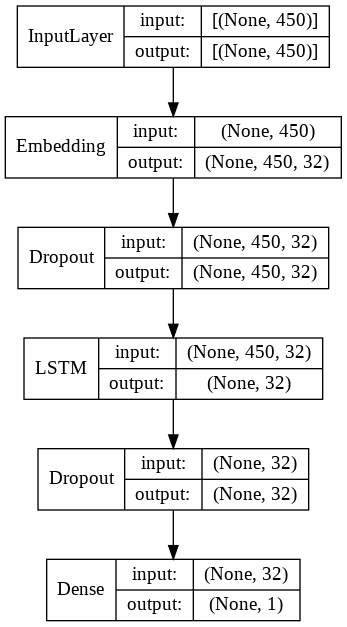

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)


In [ ]:
# Train the LSTM on the training data
history = model.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=5, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
)

Epoch 1/5
6/6 [==============================] - 6s 586ms/step - loss: 0.6932 - accuracy: 0.4789 - val_loss: 0.6931 - val_accuracy: 0.5176
Epoch 2/5
6/6 [==============================] - 3s 483ms/step - loss: 0.6921 - accuracy: 0.5640 - val_loss: 0.6927 - val_accuracy: 0.5147
Epoch 3/5
6/6 [==============================] - 3s 491ms/step - loss: 0.6908 - accuracy: 0.5342 - val_loss: 0.6920 - val_accuracy: 0.5176
Epoch 4/5
6/6 [==============================] - 3s 479ms/step - loss: 0.6872 - accuracy: 0.5372 - val_loss: 0.6905 - val_accuracy: 0.5147
Epoch 5/5
6/6 [==============================] - 3s 479ms/step - loss: 0.6799 - accuracy: 0.5659 - val_loss: 0.6853 - val_accuracy: 0.5235


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(X_test)
classification_report = classification_report(y_test, predicted_classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.47      0.97      0.63       136
           1       0.76      0.08      0.14       164

    accuracy                           0.48       300
   macro avg       0.62      0.52      0.39       300
weighted avg       0.63      0.48      0.36       300



What are you noticing here? Anything unexpected? How does this model compare to the one built with the IMDB dataset in class? Any ideas on how to improve it?

The LSTM model is displaying interesting behaviour. For most of the data in test set, it is predicting it as zeros. due to which the recall of zeros is 0.97 and the recall of ones is 0.08. The accuracy is also around 0.6, which clearly says that the model is predicting zeros for most of the dataset.


Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset fine-tune a BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the source dataset has FIVE different classes: background, objective, method, result, and conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. 

In [1]:
with open('/content/train.txt', 'r') as file:
    data_6 = file.read()

In [2]:
X = []
y = []
labels = ['OBJECTIVE','RESULTS','METHODS','BACKGROUND','CONCLUSIONS']

In [3]:
rows = data_6.split('\n')
for row in rows:
  if(len(row.split('\t')) == 2):
    label, content = row.split('\t')
    if(label in labels):
      y.append(labels.index(label))
      X.append(content)

In [4]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [5]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [6]:
!pip install transformers

In [7]:
sentences = X

In [8]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1', do_lower_case=True)

Loading BERT tokenizer...


In [7]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [9]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Tokenized:  ['to', 'investigate', 'the', 'efficacy', 'of', '6', 'weeks', 'of', 'daily', 'low', '-', 'dose', 'oral', 'pre', '##dn', '##is', '##olo', '##ne', 'in', 'improving', 'pain', ',', 'mobility', ',', 'and', 'systemic', 'low', '-', 'grade', 'inflammation', 'in', 'the', 'short', 'term', 'and', 'whether', 'the', 'effect', 'would', 'be', 'sustained', 'at', '12', 'weeks', 'in', 'older', 'adults', 'with', 'moderate', 'to', 'severe', 'knee', 'o', '##ste', '##oar', '##th', '##rit', '##is', '(', 'o', '##a', ')', '.']
Token IDs:  [1106, 8242, 1103, 23891, 1104, 127, 2277, 1104, 3828, 1822, 118, 13753, 9619, 3073, 22834, 1548, 12805, 1673, 1107, 9248, 2489, 117, 16178, 117, 1105, 27410, 1822, 118, 3654

In [23]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True,max_length=512,truncation=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  512


In [10]:
max_len = 512

In [11]:
labels = y

In [12]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  1106,  8242,  1103, 23891,  1104,   127,  2277,  1104,  3828,
         1822,   118, 13753,  9619,  3073, 22834,  1548, 12805,  1673,  1107,
         9248,  2489,   117, 16178,   117,  1105, 27410,  1822,   118,  3654,
        24970,  1107,  1103,  1603,  1858,  1105,  2480,  1103,  2629,  1156,
         1129,  8505,  1120,  1367,  2277,  1107,  2214,  6323,  1114,  8828,
         1106,  5199,  5656,   184, 13894, 19243,  1582,  7729,  1548,   113,
          184,  1161,   114,   102])


In [13]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

162,036 training samples
18,004 validation samples


In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Train

In [84]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [38]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [39]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [40]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [41]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [42]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:14.
  Batch    80  of  5,064.    Elapsed: 0:00:28.
  Batch   120  of  5,064.    Elapsed: 0:00:42.
  Batch   160  of  5,064.    Elapsed: 0:00:56.
  Batch   200  of  5,064.    Elapsed: 0:01:11.
  Batch   240  of  5,064.    Elapsed: 0:01:26.
  Batch   280  of  5,064.    Elapsed: 0:01:40.
  Batch   320  of  5,064.    Elapsed: 0:01:55.
  Batch   360  of  5,064.    Elapsed: 0:02:09.
  Batch   400  of  5,064.    Elapsed: 0:02:24.
  Batch   440  of  5,064.    Elapsed: 0:02:38.
  Batch   480  of  5,064.    Elapsed: 0:02:53.
  Batch   520  of  5,064.    Elapsed: 0:03:07.
  Batch   560  of  5,064.    Elapsed: 0:03:22.
  Batch   600  of  5,064.    Elapsed: 0:03:36.
  Batch   640  of  5,064.    Elapsed: 0:03:51.
  Batch   680  of  5,064.    Elapsed: 0:04:06.
  Batch   720  of  5,064.    Elapsed: 0:04:20.
  Batch   760  of  5,064.    Elapsed: 0:04:35.
  Batch   800  of  5,064.    Elapsed: 0:04:49.
  Batch   840  of

In [56]:
model = torch.load('/content/model_complete')

Testing

In [58]:
with open('/content/test.txt', 'r') as file:
    data_test = file.read()

In [59]:
X_test = []
y_test = []
labels = ['OBJECTIVE','RESULTS','METHODS','BACKGROUND','CONCLUSIONS']

rows = data_test.split('\n')
for row in rows:
  if(len(row.split('\t')) == 2):
    label, content = row.split('\t')
    if(label in labels):
      y_test.append(labels.index(label))
      X_test.append(content)

In [60]:
sentences = X_test
labels = y_test

In [63]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [64]:
# import pandas as pd

# # Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# # Report the number of sentences.
# print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# # Create sentence and label lists
# sentences = df.sentence.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [65]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


Please present the per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?

In [72]:
predictions_final = []

for batch_pred in predictions:
  predictions_final.extend(np.argmax(batch_pred, axis=1).flatten())

In [78]:
true_final = []

for batch_pred in true_labels:
  true_final.extend(batch_pred)

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [83]:
print(classification_report(true_final, predictions_final, digits=4))

              precision    recall  f1-score   support

           0     0.6994    0.6074    0.6501      2333
           1     0.9247    0.9023    0.9133      9713
           2     0.9256    0.9472    0.9363      9897
           3     0.6858    0.7735    0.7271      3621
           4     0.8400    0.8123    0.8259      4571

    accuracy                         0.8651     30135
   macro avg     0.8151    0.8085    0.8106     30135
weighted avg     0.8660    0.8651    0.8649     30135



## Bonus

BioBert

In [15]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "dmis-lab/biobert-base-cased-v1.1", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.1 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [16]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [17]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [18]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))   

In [19]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:15.
  Batch    80  of  5,064.    Elapsed: 0:00:29.
  Batch   120  of  5,064.    Elapsed: 0:00:44.
  Batch   160  of  5,064.    Elapsed: 0:00:58.
  Batch   200  of  5,064.    Elapsed: 0:01:12.
  Batch   240  of  5,064.    Elapsed: 0:01:27.
  Batch   280  of  5,064.    Elapsed: 0:01:41.
  Batch   320  of  5,064.    Elapsed: 0:01:56.
  Batch   360  of  5,064.    Elapsed: 0:02:10.
  Batch   400  of  5,064.    Elapsed: 0:02:24.
  Batch   440  of  5,064.    Elapsed: 0:02:39.
  Batch   480  of  5,064.    Elapsed: 0:02:53.
  Batch   520  of  5,064.    Elapsed: 0:03:08.
  Batch   560  of  5,064.    Elapsed: 0:03:22.
  Batch   600  of  5,064.    Elapsed: 0:03:36.
  Batch   640  of  5,064.    Elapsed: 0:03:51.
  Batch   680  of  5,064.    Elapsed: 0:04:05.
  Batch   720  of  5,064.    Elapsed: 0:04:20.
  Batch   760  of  5,064.    Elapsed: 0:04:34.
  Batch   800  of  5,064.    Elapsed: 0:04:49.
  Batch   840  of